In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

import warnings
warnings.filterwarnings('ignore')


In [ ]:
#load dataset
#explore data

df = pd.read_csv('/content/water_potability.csv')  # Upload this file from Kaggle
df.head()


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [ ]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3276 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          3276 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3276 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.469956,32.879761,8768.570828,1.583085,36.142612,80.824064,3.308162,15.769881,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.277673,176.850538,15666.690300,6.127421,317.094638,365.734414,12.065801,56.647656,3.439711,0.000000
50%,7.080795,196.967627,20927.833605,7.130299,333.775777,421.884968,14.218338,66.396293,3.955028,0.000000
75%,7.870050,216.667456,27332.762125,8.114887,350.385756,481.792305,16.557652,76.666609,4.500320,1.000000
max,14.000000,323.124000,61227.196010,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [ ]:
#Data cleaning

s=df.isnull().sum()
print(s)

# Fill missing values with mean
df.fillna(df.mean(), inplace=True)


ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64


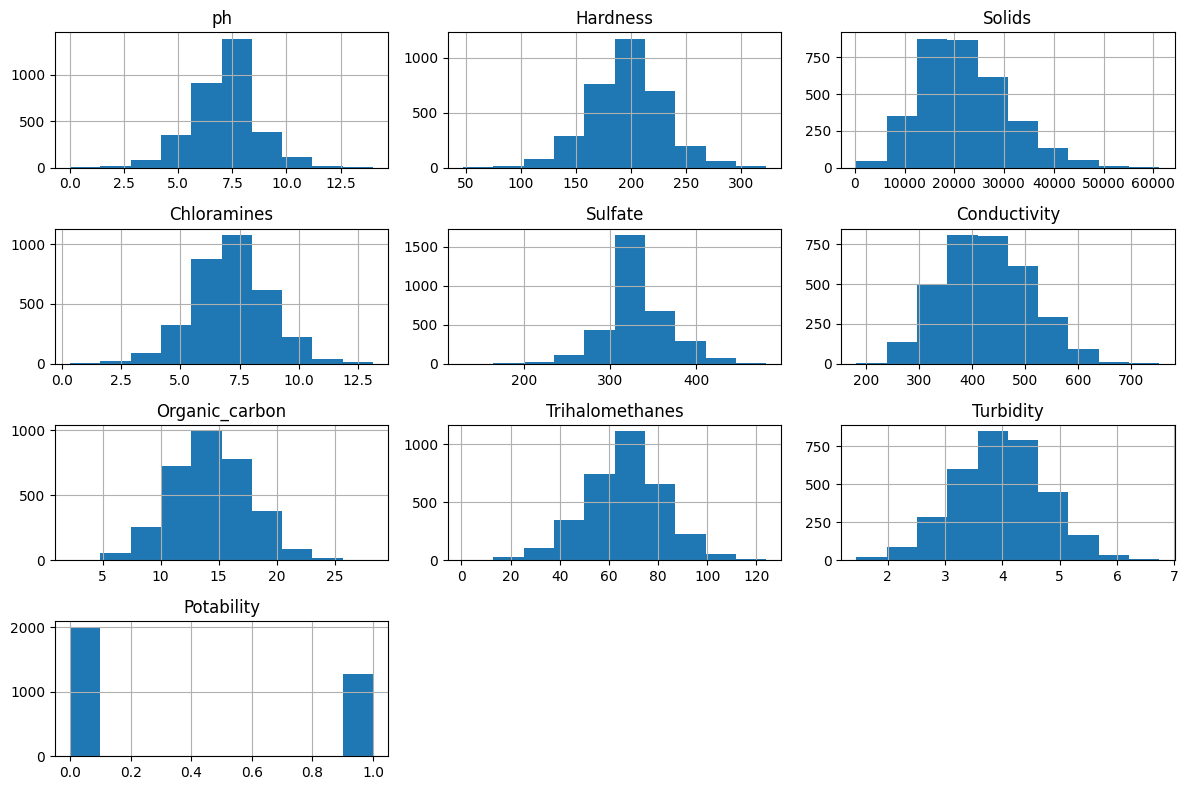

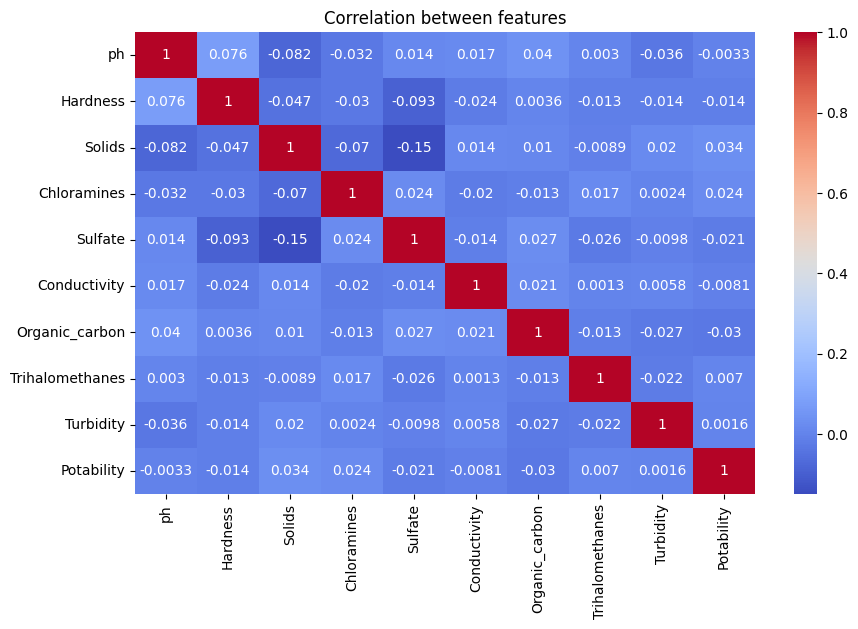

In [ ]:
#Exploratory Data Analysis (EDA)

# Histogram
df.hist(figsize=(12, 8))
plt.tight_layout()
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation between features")
plt.show()


In [ ]:
#Preprocessing

X = df.drop('Potability', axis=1)
y = df['Potability']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)


In [ ]:
#Model Training
# Random Forest Classifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.6666666666666666
              precision    recall  f1-score   support

           0       0.68      0.88      0.77       510
           1       0.61      0.32      0.42       309

    accuracy                           0.67       819
   macro avg       0.65      0.60      0.59       819
weighted avg       0.65      0.67      0.63       819



In [ ]:
# GUI: User Input using IPyWidgets

import ipywidgets as widgets
from IPython.display import display

def predict_water_quality(ph, hardness, solids, chloramines, sulfate, conductivity, organic_carbon, trihalomethanes, turbidity):
    input_data = np.array([[ph, hardness, solids, chloramines, sulfate,
                            conductivity, organic_carbon, trihalomethanes, turbidity]])
    input_scaled = scaler.transform(input_data)
    prediction = rf.predict(input_scaled)
    result = "Safe to Drink ✅" if prediction[0] == 1 else "Not Safe ❌"
    print("Prediction:", result)

# Create widgets
ph = widgets.FloatSlider(value=7, min=0, max=14, step=0.1, description='pH:')
hardness = widgets.FloatSlider(value=150, min=0, max=300, description='Hardness:')
solids = widgets.FloatSlider(value=15000, min=0, max=50000, description='Solids:')
chloramines = widgets.FloatSlider(value=7, min=0, max=15, description='Chloramines:')
sulfate = widgets.FloatSlider(value=300, min=0, max=500, description='Sulfate:')
conductivity = widgets.FloatSlider(value=400, min=0, max=1000, description='Conductivity:')
organic_carbon = widgets.FloatSlider(value=10, min=0, max=30, description='Organic Carbon:')
trihalomethanes = widgets.FloatSlider(value=60, min=0, max=120, description='Trihalomethanes:')
turbidity = widgets.FloatSlider(value=4, min=0, max=10, description='Turbidity:')

ui = widgets.VBox([ph, hardness, solids, chloramines, sulfate,
                   conductivity, organic_carbon, trihalomethanes, turbidity])

out = widgets.interactive_output(predict_water_quality, {
    'ph': ph,
    'hardness': hardness,
    'solids': solids,
    'chloramines': chloramines,
    'sulfate': sulfate,
    'conductivity': conductivity,
    'organic_carbon': organic_carbon,
    'trihalomethanes': trihalomethanes,
    'turbidity': turbidity
})

display(ui, out)


Output()

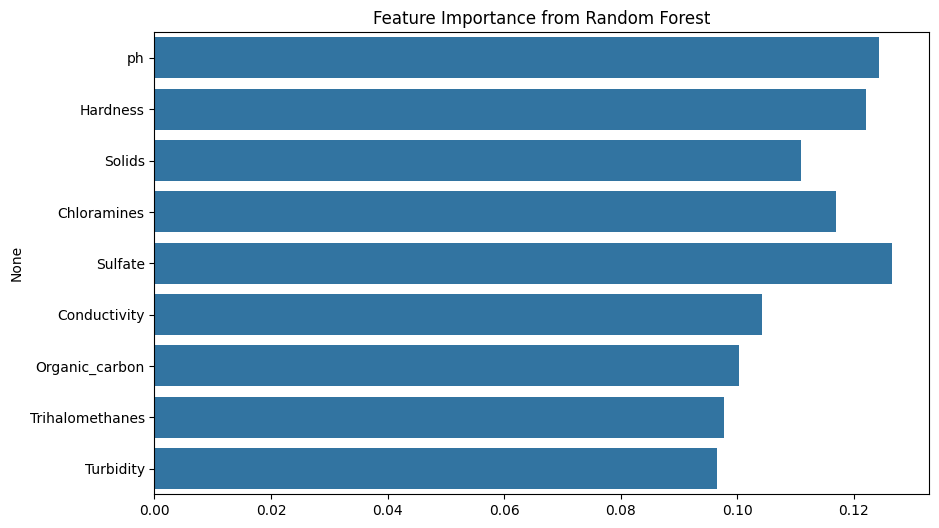

In [ ]:
# Visualization of Prediction Results
# Feature importance
importances = rf.feature_importances_
feature_names = df.columns[:-1]

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importance from Random Forest")
plt.show()
